<a href="https://colab.research.google.com/github/SEKAR147/Demo-repo/blob/main/Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Computer vision libraries in Pytorch

* [`torchvision`] - base domain library for Pytorch computer vision
* [`torchvision.datasets`] - get datasets and data loading for compputer vision here
* [`torchvision.models`] - get pretrained cv models that you can leverage for your own peoblems
* [`torchvision.transforms`] - functions for manipulating your vision data(images)to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for Pytorch.
* `torch.utils.data.DataLoader` - creates a python iterble over a dataset

In [1]:
# Import Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visulaization
import matplotlib.pyplot as plt

## check versions
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu124
0.20.1+cu124


## 1. Getting a dataset
The dataset we'll be using fashionMNIST from torchvision.datasets

In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data" , # where to download the data
    train = True , # Do we want the training dataset
    download = True, # Do we want to download yes /no
    transform = torchvision.transforms.ToTensor(), #how do we want to transform the data?
    target_transform = None # how do we want to transform the labels/targers
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False, # to get test data
    download = True,
    transform = ToTensor(),
    target_transform = None
)


100%|██████████| 26.4M/26.4M [00:02<00:00, 9.46MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 151kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.80MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 11.0MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data) , len(test_data)

(60000, 10000)

In [4]:
### See the 1st training example
image , label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
#Check the Shape of our image
print(f"Image Shape:{image.shape} -> [color_channels , height , width]")
print(f"Image label : {class_names[label]}")

Image Shape:torch.Size([1, 28, 28]) -> [color_channels , height , width]
Image label : Ankle boot


## 1.2 Visualizing our data

imagen shape:torch.Size([1, 28, 28])


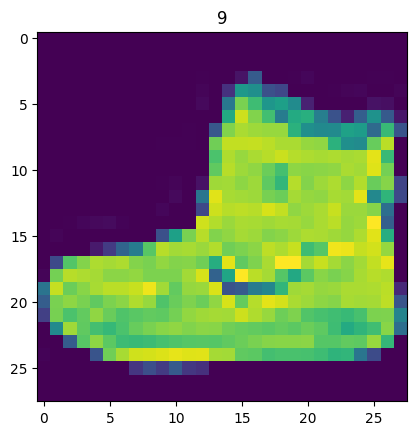

In [9]:
import matplotlib.pyplot  as plt
image , label = train_data[0]
print(f"imagen shape:{image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

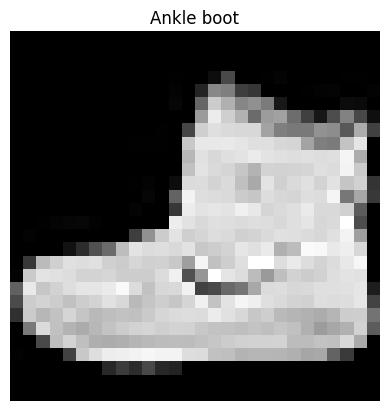

In [10]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

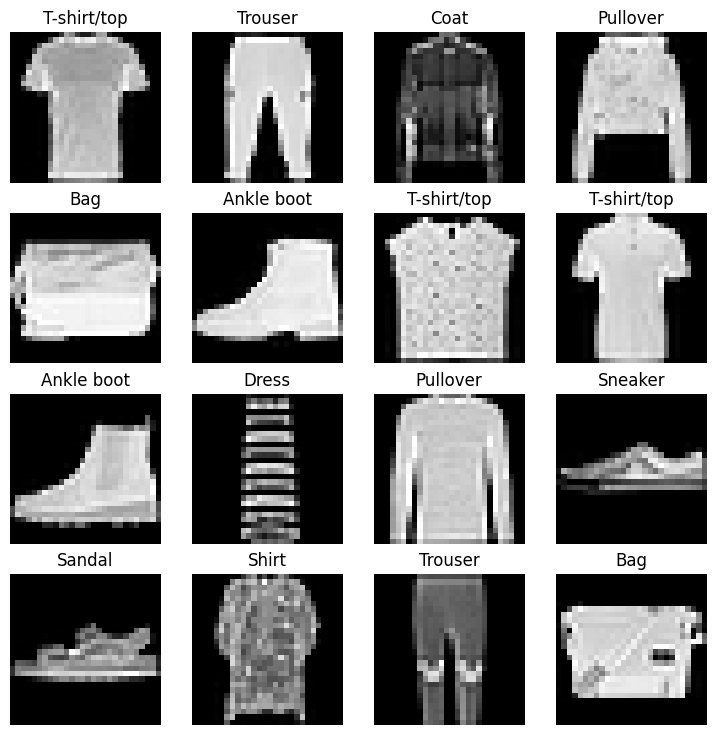

In [11]:
## plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows , cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0 , len(train_data) , size=[1]).item()
  img , label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze() , cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)
  #print(random_idx)

Do you think these items of clothing(images) could be modelled with pure linear lines? or do you think we'll need non - linearties

In [12]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2.Prepare Dataloader
Right now , our data is in the form of pytorch datasets.
dataloader turns our dataset into a python iterable.
more specifically , we want to our data into batches(mini - bathes).

why would we do this?
1. It is more computationally efficient , as in, your computing hardware may not be able to look(store in m/y) at 60000 images in one hit , so we break it down to 32 images at a time(batch size of 32 )
2. it gives our neural network more chances to update it's gradients per epoch

In [13]:
from torch.utils.data import DataLoader

#setup the batch size Hyperparameter
BATCH_SIZE = 32

# Turn Datasets into iterbales (batches)
train_dataloader = DataLoader(dataset = train_data,
                             batch_size = BATCH_SIZE,
                             shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e03057f33d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e03059b70d0>)

In [14]:
# lets check out what we've created
print(f"DataLoader:{train_dataloader ,test_dataloader}")
print(f"Length of train_dataloader:{len(train_dataloader)} bathces of {BATCH_SIZE}....")
print(f"Length of test_dataloader:{len(test_dataloader)} bathces of {BATCH_SIZE}....")

DataLoader:(<torch.utils.data.dataloader.DataLoader object at 0x7e03057f33d0>, <torch.utils.data.dataloader.DataLoader object at 0x7e03059b70d0>)
Length of train_dataloader:1875 bathces of 32....
Length of test_dataloader:313 bathces of 32....


In [15]:
#check out what's inside the training dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Label:6 , label size:torch.Size([])


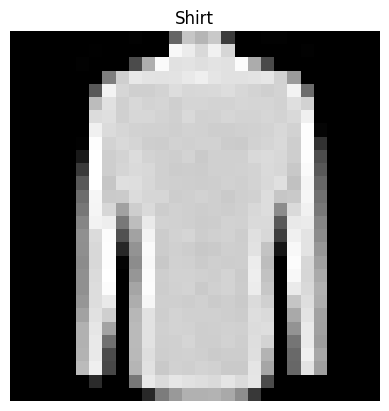

In [16]:
#show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0 , len(train_features_batch),size=[1]).item()
img , label = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Label:{label} , label size:{label.shape}")

## 3. Model 0: Build a Baseline Model

when starting to build a series od machine learning modelling experiments,it's best practice to start with a baseline model.
A baseline model is a simple model you will try and improve upon with subsequent models/experiments

In other words: Start simply and add Complexity when necessary

In [17]:
#create a  Flatten layer
flatten_model = nn.Flatten()

#get a single sample
x = train_features_batch[0]

#Flatten the shape
output = flatten_model(x) # Perform forward pass

#print out what happened
print(f"Shape before flattening :{x.shape} ->[color_channels , height , width]")
print(f"Shape after Flattening :{output.shape} ->[color_chanenls , height*width]")

Shape before flattening :torch.Size([1, 28, 28]) ->[color_channels , height , width]
Shape after Flattening :torch.Size([1, 784]) ->[color_chanenls , height*width]


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )
  def forward(self , x):
    return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 =FashionMNISTModelV0(
    input_shape = 784,
    hidden_units= 10,
    output_shape = len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

## 3.1 Setup a loss,optimizer and Evaluation Metrics

* Loss Function - since we're working with multi class data , our loss fucntion wil be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation Metric - since we're working on a classification problem , let's use accuracy as our evalution metric

In [22]:
import requests
from pathlib import Path

#Download some helper fucntions from Learn Pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists , skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py" , "wb") as f:
    f.write(request.content)


In [23]:
 # Import accuaracy metric
 from helper_functions import accuracy_fn

 # Setup loss function and optimizer
 loss_fn = nn.CrossEntropyLoss()
 optimizer = torch.optim.SGD(params = model_0.parameters(),
                             lr = 0.1)

### 3.2 creating a function to time our experiments

Machine learning is very experimental
Two of the main things you'll often want to track are:
1. Model's Performace(loss and acuracy values etc)
2. How fast it runs

In [24]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  """Prints differnce between start and end time."""
  total_time = end - start
  print(f"Train time on {device}:{total_time:.3f} seconds")
  return total_time

In [25]:
start_time = timer()
#some code
end_time = timer()
print_train_time(start = start_time , end = end_time ,device='cpu' )

Train time on cpu:0.000 seconds


4.565099999354061e-05

### 3.3 creating a training loop and training a model on batches of data
1. Loop through epochs
2. Loop through training batches ,perform training steps,calculate the train loss per batch
3. Loop through testing batches , perform testing steps,calculate the test loss per batch
4. print out what's happening
5. time it all.


In [26]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the no of epochs (we'll keep this small for faster training time)
epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n--------")
  ### training
  train_loss = 0
  # add a loop to loop through the traning batches
  for batch,(x,y) in enumerate (train_dataloader):
    model_0.train()
    #1.Forward pass
    y_pred = model_0(x)

    # 2.Calculate loss (per batch)
    loss = loss_fn(y_pred , y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. optimizer steo
    optimizer.step()

  # print out what's happening
    if batch % 400 == 0:
        print(f"Looked at{batch * len(x)}/{len(train_dataloader.dataset)} samples.")
  # divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)


  ### testing
  test_loss , test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for x_test , y_test in test_dataloader:
      #1. Forward pass
      test_pred = model_0(x_test)

      #2. calculate loss
      test_acc += loss_fn(test_pred , y_test)

      # 3. calculate accuracy
      test_acc += accuracy_fn(y_true = y_test , y_pred = test_pred.argmax(dim = 1))
    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # print out what's happning
  print(f"\n Train loss :{train_loss:.4f} | Test Loss:{test_loss:.4f} , Test acc:{test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters())))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
--------
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.

 Train loss :0.5904 | Test Loss:0.0000 , Test acc:82.5483
Epoch:1
--------
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.

 Train loss :0.4763 | Test Loss:0.0000 , Test acc:83.6768
Epoch:2
--------
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.

 Train loss :0.4550 | Test Loss:0.0000 , Test acc:83.9032
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
     

In [27]:
next(model_0.parameters()).device

device(type='cpu')

## 4. Make predictions and get Model 0 Results

In [28]:
torch.manual_seed(42)
def eval_model(model : torch.nn.Module,
               data_loader: torch.utils.data.dataloader,
               loss_fn :torch.nn.Module,
               accuracy_fn):
  loss , acc = 0,0
  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:
      #Make Predictions
      y_pred = model(x)

      ## Accumualate the loss and acc Values per batch
      loss+=loss_fn(y_pred , y)
      acc+=accuracy_fn(y_true = y,
                       y_pred = y_pred.argmax(dim = 1))
      # Scale loss amd acc to find the average loss/acc per batch
      loss/= len(data_loader)
      acc /= len(data_loader)

    return {"Model_name":model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc}

  # Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                            data_loader = test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn = accuracy_fn)
model_0_results



{'Model_name': 'FashionMNISTModelV0',
 'model_loss': 0.0010611428879201412,
 'model_acc': 0.30028917735831345}

In [29]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for x, y in data_loader:
            # Make predictions with the model
            y_pred = model(x)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}